In [1]:
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from divtel.telescope import Telescope, Array

In [2]:
file = open("/Users/alicedonini/Lavoro/Divergent/Divergent-Pointing/layout-3AL4M15-5.txt", "r")
#array = Array()
tels = []
for line in file:  
    #split the string on whitespace, return a list of numbers as strings
    coord_str = line.split()
    coord_str[0], coord_str[1], coord_str[2] = float(coord_str[0]), float(coord_str[1]), float(coord_str[2]) 
    coord = [x*u.m for x in coord_str]
    #print(coord_float)
    tel = Telescope(coord[0],coord[1],coord[2],coord[3],coord[4])
    tels.append(tel)
    
array = Array(tels)

for tel in array.telescopes:
    #print(tel.fov)
    print(tel.id)
    #print(tel.position)
    #print(tel.camera_radius)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [69]:
#Define where you want to point (ex. source in the simulation)
az = 180 * u.deg
alt = 70 * u.deg
#Define divergence
div=0.01453

#Divergent part
np.array(array.divergent_pointing(div, alt, az))
tels_alt = np.array([tel.alt.value for tel in array.telescopes])
tels_az = np.array([tel.az.value for tel in array.telescopes])
print("Az: ", np.degrees(tels_az))
print("Alt: ", np.degrees(tels_alt))
#print("barycenter: ", array.barycenter)

#Add 360deg to negative Az value
for k, i in enumerate(tels_az):
    #print(i)
    if i < 0:
        az_new = i + np.radians(360)
    else:
        az_new = i
    tels_az[k] = az_new
print(tels_az)
print("Az: ", np.degrees(tels_az))

telescopes_distances = np.sqrt(np.sum((array.positions_array - array.barycenter)**2, axis=1))
p = np.average(array.pointing_vectors, weights=telescopes_distances, axis=0)
print(np.degrees(p))

Az:  [-179.17509744  177.90953783  178.21117799 -178.81970701  179.44899477
  175.42878797  174.49155708  177.239864   -175.72124288 -175.84923649
 -176.57706573  171.62340075 -171.5770787  -172.70349823  179.54021366
  172.1019862   176.76128392 -178.70510693 -171.91919703]
Alt:  [70.05636955 70.29482573 71.16322776 70.82511845 68.98667364 69.11423347
 70.6610257  71.89804895 71.50609501 69.97094082 68.95927474 69.54272737
 70.63378362 69.02090674 70.57576322 67.91309189 67.95124881 67.82348673
 72.06357324]
[3.15598992 3.10510721 3.11037182 3.16219265 3.1319758  3.06180995
 3.04545219 3.09341919 3.21627105 3.21403714 3.20133413 2.99539342
 3.28860036 3.26894063 3.13356787 3.00374631 3.08506639 3.1641928
 3.28262927]
Az:  [180.82490256 177.90953783 178.21117799 181.18029299 179.44899477
 175.42878797 174.49155708 177.239864   184.27875712 184.15076351
 183.42293427 171.62340075 188.4229213  187.29650177 179.54021366
 172.1019862  176.76128392 181.29489307 188.08080297]
[-1.96473984e+0

(-403.96335663082436,
 233.25335663082436,
 -342.23567660044154,
 419.2256766004415)

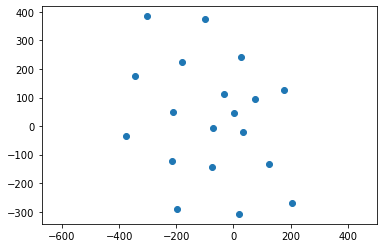

In [70]:
#array layout plot
plt.scatter(array.positions_array[:,0], array.positions_array[:,1])
plt.axis('equal')

(-342.2303566308244, 419.22035663082437, -403.9686766004415, 233.2586766004415)

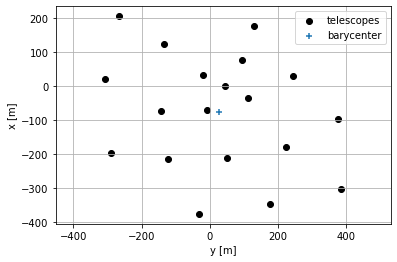

In [71]:
#2D display
ax = array.display_2d(projection='xy')
ax.legend()
plt.axis('equal')

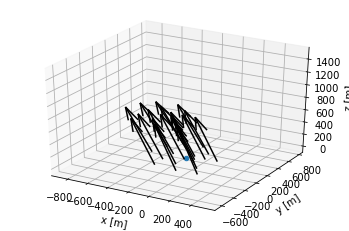

In [72]:
#3D display
ax = array.display_3d()
fig = ax.scatter(array.barycenter[0], array.barycenter[1], array.barycenter[2])
#plt.savefig("3d_0.png")

In [73]:
#tel dictionary with div pointing
tels_dict = {}
point_az_dict = {}
point_alt_dict = {}

for tel_id, tel in enumerate(array.telescopes, 1):
    #tels_dict[ii] = {'THETA': 90-np.rad2deg(tel.alt.value),
    #                 'PHI': np.rad2deg(np.mod(tel.az.value, 2*np.pi))}
    tels_dict[tel_id] = {'az': tel.az,
                     'alt': tel.alt}
    point_az_dict[tel_id] = tel.az.value * u.rad
    point_alt_dict[tel_id] = tel.alt.value * u.rad

In [74]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.time import Time

#print(tels_az)

location = EarthLocation.of_site('Roque de los Muchachos')
obstime = Time('2013-11-01T03:00')
altaz = AltAz(location=location, obstime=obstime)

#Define pointing as a SkyCoord object
#tels_pointing = {}
#for tel_id, tel in enumerate(array.telescopes, 1):
#    tels_pointing[tel_id] = SkyCoord(alt=tel.alt,az=tel.az, frame=AltAz())
#print(tels_pointing)

tels_pointing = SkyCoord(alt=tels_alt,az=tels_az, frame=altaz, unit='rad')
#print(tels_pointing)

array_pointing = SkyCoord(alt=70, az=180, frame=altaz, unit='deg')
#print(array_pointing)

icrs_point = tels_pointing.transform_to(ICRS())
print(tels_pointing.transform_to(ICRS()))

gal_point = tels_pointing.galactic
#print(fk5_point)


<SkyCoord (ICRS): (ra, dec) in deg
    [(67.20874578,  8.78690084), (68.20674746,  9.03626889),
     (68.07822886,  9.9011558 ), (67.09932631,  9.55729789),
     (67.69425894,  7.71682234), (69.13846544,  7.90292028),
     (69.3394771 ,  9.47041446), (68.36335829, 10.64678145),
     (66.11319839, 10.27862899), (66.05621831,  8.74385676),
     (66.25526523,  7.71921132), (70.44472442,  8.46494624),
     (64.66911169,  9.54146839), (64.86336952,  7.89362539),
     (67.64773066,  9.30563028), (70.47899401,  6.8263713 ),
     (68.71985845,  6.71215516), (67.00439826,  6.55673304),
     (64.96335864, 10.94595625)]>


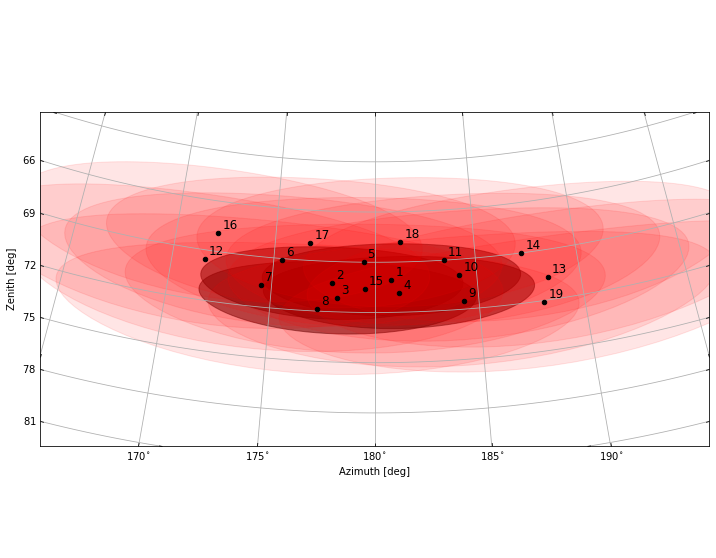

In [75]:
#WORKING
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

# PolarAxes.PolarTransform takes radian. However, we want our coordinate
# system in degree
tr = Affine2D().scale(np.pi/180., 1.).translate(+np.pi/2.,0) + PolarAxes.PolarTransform()

# polar projection, which involves cycle, and also has limits in
# its coordinates, needs a special method to find the extremes
# (min, max of the coordinate within the view).

# 20, 20 : number of sampling points along x, y direction
n = 20
extreme_finder = angle_helper.ExtremeFinderCycle(10, 10,
                                                 lon_cycle=360,
                                                 lat_cycle=None,
                                                 lon_minmax=None,
                                                 lat_minmax=(-90, 90),
                                                 )

grid_locator1 = angle_helper.LocatorDMS(12)
# Find a grid values appropriate for the coordinate (degree,
# minute, second).

tick_formatter1 = angle_helper.FormatterDMS()
# And also uses an appropriate formatter.  Note that,the
# acceptable Locator and Formatter class is a bit different than
# that of mpl's, and you cannot directly use mpl's Locator and
# Formatter here (but may be possible in the future).

grid_helper = GridHelperCurveLinear(tr,
                                    extreme_finder=extreme_finder,
                                    grid_locator1=grid_locator1,
                                    tick_formatter1=tick_formatter1
                                    )

fig = plt.figure(figsize=(12,10))
fig.clf()
ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

# make ticklabels of right and top axis visible.
ax1.axis["right"].major_ticklabels.set_visible(False)
ax1.axis["top"].major_ticklabels.set_visible(False)
ax1.axis["bottom"].major_ticklabels.set_visible(True)

# let right axis shows ticklabels for 1st coordinate (angle)
#ax1.axis["right"].get_helper().nth_coord_ticks = 0
# let bottom axis shows ticklabels for 2nd coordinate (radius)
#ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

fig.add_subplot(ax1)
# A parasite axes with given transform
ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
# note that ax2.transData == tr + ax1.transData
# Anything you draw in ax2 will match the ticks and grids of ax1.
ax1.parasites.append(ax2)

for i, tel in enumerate(array.telescopes, 1):
    tel_alt = tel.alt
    tel_az = tel.az
    tels_points = SkyCoord(alt=tel.alt.value,az=tel.az.value, frame=altaz, unit='rad')
    x = tels_points.az.degree
    y = tels_points.alt.degree
    #print(x)
    if i <= 4:
        r = SphericalCircle((x * u.deg, y * u.deg), tel.camera_radius * u.degree, color='black', alpha=0.5, transform=ax2.transData)
    else:
        r = SphericalCircle((x * u.deg, y * u.deg), tel.camera_radius * u.degree, color='r', alpha=0.1, transform=ax2.transData)
#for i, tel in enumerate(tels_pointing, 1):
    #x = tel.az.degree
    #print(x)
    #y = tel.alt.degree
    #r = plt.Circle((x,y), 2, facecolor="red")
    #r = SphericalCircle((x * u.deg, y * u.deg), 7.7/2 * u.degree, color='r', alpha=0.1, transform=ax2.transData)
    #TODO!!!!! insert right value of radius of the field of view
    ax1.add_patch(r)
    ax2.annotate(i, (x, y), fontsize=12, xytext=(4, 4), textcoords='offset pixels', zorder=10)
    ax1.scatter(x, y, c = "black", s=20, transform=ax2.transData, zorder=10)

ax1.set_xlim(-20,20)
ax1.set_ylim(-80, -60)
#ax1.set_xlim(-181, 181)
#ax1.set_ylim(-91, 91)
ax1.set_aspect(1.)

ax1.grid(True)
ax1.set_xlabel("Azimuth [deg]", fontsize=20)
ax1.set_ylabel("Zenith [deg]", fontsize=20)


plt.savefig("skymap_div{}.png".format(div))
plt.show()


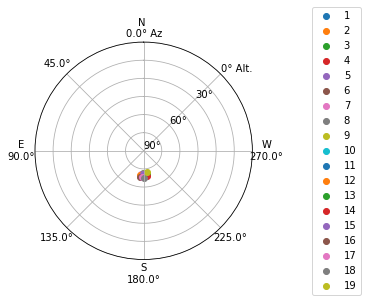

In [76]:
#SKYMAP
from astroplan.plots import plot_sky
from astroplan import FixedTarget
from astroplan import Observer

for ii, tel in enumerate(icrs_point, 1):
    #print(tel.ra)
    point = SkyCoord(ra=tel.ra, dec=tel.dec)
    target = FixedTarget(coord=point, name=ii)
    #print(target.coord)
    location = EarthLocation.of_site('Roque de los Muchachos')
    observer = Observer(location=location, name="Roque")
    observe_time = Time('2013-11-01T03:00')
    plot_sky(target, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.savefig("astroplan_skymap_div{}.png".format(div))

plt.show()

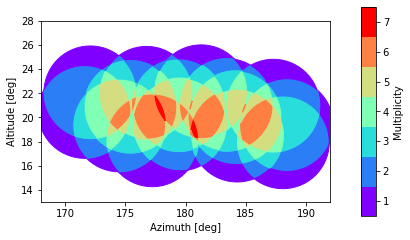

2.9930904713374984 2.8386887014784405 1.6848408534572161
232.99407642199608


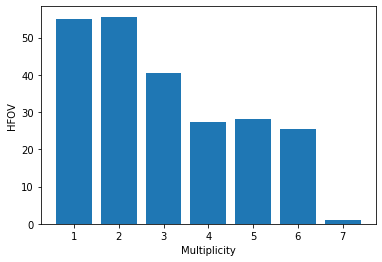

In [77]:
from descartes import PolygonPatch
from shapely.ops import unary_union, polygonize
from shapely.geometry import mapping, Polygon, Point, LineString

polygons = {}
for ii, tel in enumerate(array.telescopes, 1):
    #if ii < 5: #LST only
    if ii > 4: #MST only
        tel_alt = tel.alt
        tel_az = tel.az
        tels_points = SkyCoord(alt=tel.alt.value,az=tel.az.value, frame=altaz, unit='rad')
        polygons[ii-1] = Point(tels_points.az.degree, 90-tels_points.alt.degree).buffer(tel.camera_radius)

#for ii, tel in enumerate(tels_pointing, 1):
    #polygons[ii-1] = Point(tel.az.degree, 90-tel.alt.degree).buffer(7.7/2)
#print(polygons)

xrange = [168, 192]
yrange = [13, 28]

rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

dict_count_overlaps = {}
for i in range(len(res)):
     dict_count_overlaps[i] = 0
     for j in range(len(ori)):
         if np.isclose(res[i].difference(ori[j]).area, 0):
             dict_count_overlaps[i] +=1
             #print(f"res_{colors[i]}, orig_{j+1}")


max_multiplicity = max(dict_count_overlaps.values())
#print(max_multiplicity)

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
bounds = np.arange(max_multiplicity + 1) + 1

fig = plt.figure()
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])

fig.subplots_adjust(top=0.85)

for pol_id, pol in result.items():
     colore = dict_count_overlaps[pol_id]
     ax.add_patch(
         PolygonPatch(mapping(pol), color=color_list[colore-1])
     )

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                label='Multiplicity')
cb1.set_ticks(np.arange(max_multiplicity + 1) + 0.5)
cb1.set_ticklabels(np.arange(max_multiplicity + 1) + 1)

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect(1)
plt.savefig("multiplicity_plot_div{}.png".format(div))
plt.show()

hfov = []
for patchsky in res:
     hfov.append(patchsky.area)
     #print(patchsky.area)

hfov = np.array(hfov)
# multiplicity associated with each patch
overlaps = np.array(list(dict_count_overlaps.values()))
average_overlap = np.average(overlaps, weights=hfov)
variance = np.average((overlaps-average_overlap)**2, weights=hfov)
print(average_overlap, variance, np.sqrt(variance))
print(hfov.sum())
plt.figure()
plt.bar(list(set(overlaps)), [hfov[overlaps==i].sum() for i in set(overlaps)])
plt.ylabel('HFOV')
plt.xlabel('Multiplicity')
plt.savefig("multiplicity_chart_div{}.png".format(div))
plt.show()


In [78]:
filename = 'CTA-ULTRA6-LaPalma-div{}.cfg'.format(div)
with open(filename, 'w') as f:
    f.write("""#ifndef TELESCOPE
# define TELESCOPE 0
#endif\n
#if TELESCOPE == 0\n""")
    f.write('   TELESCOPE_THETA={:.2f} \n'.format(90 - array_pointing.alt.value))
    f.write('   TELESCOPE_PHI={:.2f} \n'.format(array_pointing.az.value))
    f.write("""\n% Global and default configuration for things missing in telescope-specific config.
# include <CTA-ULTRA6-LST.cfg>\n""")
    for id, tel in enumerate(tels_pointing, 1):
        zd = 90 - tel.alt.value
        f.write('\n#elif TELESCOPE == {:d}\n'.format(id))
        if id <= 4:
            f.write('#  include <CTA-ULTRA6-LST.cfg>\n')
        else:
            f.write('#  include <CTA-ULTRA6-MST-NectarCam.cfg>\n')
        f.write('   TELESCOPE_THETA={:.2f}\n'.format(zd))
        f.write('   TELESCOPE_PHI={:.2f}\n'.format(tel.az.value))
    f.write("""
#else\n
    Error Invalid telescope for CTA-ULTRA6 La Palma configuration.\n
#endif\n
trigger_telescopes = 2 % In contrast to Prod-3 South we apply loose stereo trigger immediately
array_trigger = array_trigger_ultra6_diver-test.dat""")
f.close()


In [79]:
#check cfg file
with open(filename, 'r') as f:
        print(f.read())

#ifndef TELESCOPE
# define TELESCOPE 0
#endif

#if TELESCOPE == 0
   TELESCOPE_THETA=20.00 
   TELESCOPE_PHI=180.00 

% Global and default configuration for things missing in telescope-specific config.
# include <CTA-ULTRA6-LST.cfg>

#elif TELESCOPE == 1
#  include <CTA-ULTRA6-LST.cfg>
   TELESCOPE_THETA=19.94
   TELESCOPE_PHI=180.82

#elif TELESCOPE == 2
#  include <CTA-ULTRA6-LST.cfg>
   TELESCOPE_THETA=19.71
   TELESCOPE_PHI=177.91

#elif TELESCOPE == 3
#  include <CTA-ULTRA6-LST.cfg>
   TELESCOPE_THETA=18.84
   TELESCOPE_PHI=178.21

#elif TELESCOPE == 4
#  include <CTA-ULTRA6-LST.cfg>
   TELESCOPE_THETA=19.17
   TELESCOPE_PHI=181.18

#elif TELESCOPE == 5
#  include <CTA-ULTRA6-MST-NectarCam.cfg>
   TELESCOPE_THETA=21.01
   TELESCOPE_PHI=179.45

#elif TELESCOPE == 6
#  include <CTA-ULTRA6-MST-NectarCam.cfg>
   TELESCOPE_THETA=20.89
   TELESCOPE_PHI=175.43

#elif TELESCOPE == 7
#  include <CTA-ULTRA6-MST-NectarCam.cfg>
   TELESCOPE_THETA=19.34
   TELESCOPE_PHI=174.49

#elif TELESCOPE